# Fourier transform using the numpy and Trapezoidal integration:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
np.random.seed(56)
numpoints=501
tlist=np.linspace(0,50,numpoints)
freqlist=np.round(np.random.random((4,))*10,3)
amplist=np.round(np.random.random((4,))*3,3)
y_list=np.zeros(shape=(numpoints,))
print(tlist.shape,y_list.shape)
for n in range(len(freqlist)):
    y_list=y_list+(amplist[n]*np.cos(tlist*freqlist[n]))
inf=""
for n in range(len(freqlist)):
    inf=inf+f" Omega{n+1}={freqlist[n]},  A{n+1}={amplist[n]}\n"
print(inf)

(501,) (501,)
 Omega1=9.842,  A1=1.063
 Omega2=3.334,  A2=2.44
 Omega3=6.737,  A3=0.744
 Omega4=1.964,  A4=1.376



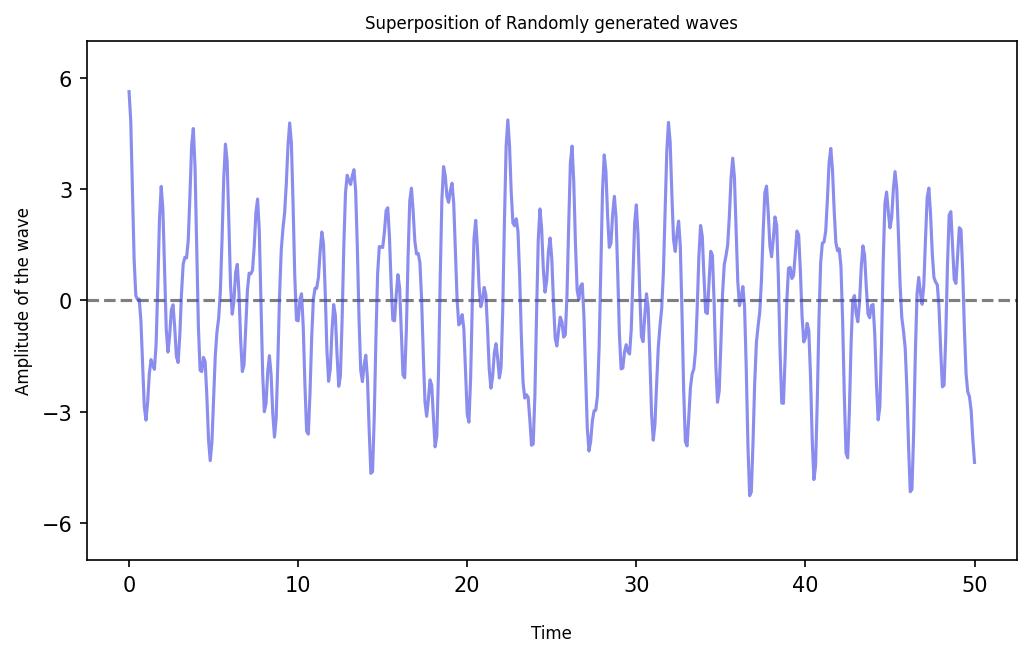

In [4]:
def setup_plot():
    plt.figure(figsize=(8,4.5),dpi=150)
    plt.ylabel("Amplitude of the wave",fontsize=8)
    plt.xlabel("\nTime",fontsize=8)
    plt.ylim(-7,7)
    plt.axhline(y=0,linestyle="--",color="black",alpha=0.5)
    plt.yticks([3*n for n in range (-2,3)])
setup_plot()
plt.plot(tlist,y_list,color="#3C42E2",alpha=0.6)
plt.title("Superposition of Randomly generated waves",fontsize=8)
plt.show()

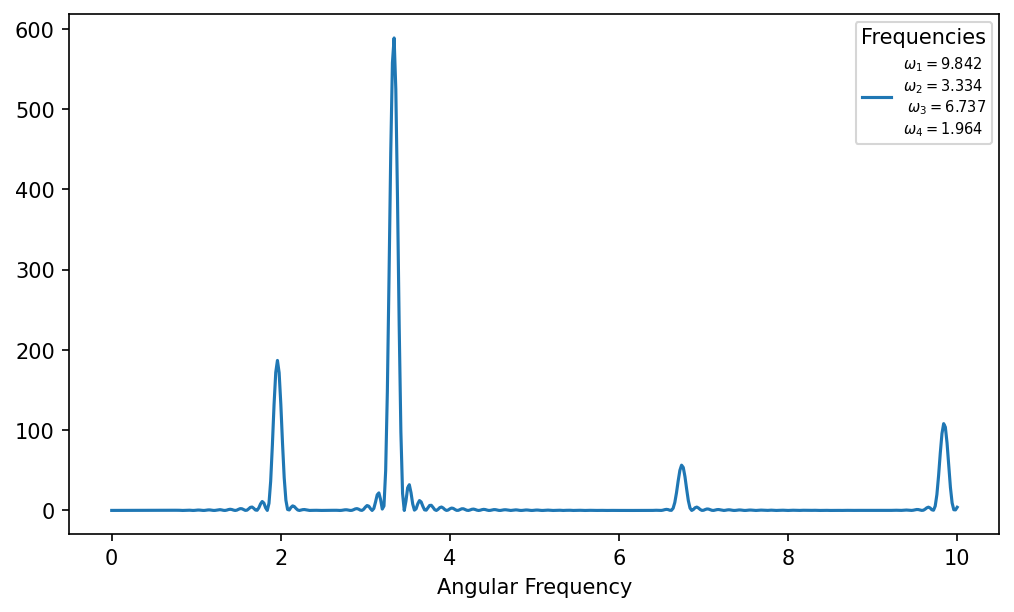

In [5]:
plt.figure(figsize=(8,4.5),dpi=150)
def fourier_transform(w,tlist=tlist,y_list=y_list):
    ftlist=[]
    for omega in w:
        integrate=sp.integrate.trapezoid(x=tlist,y=(np.exp(-1*1j*omega*tlist)*y_list/(np.sqrt(2*np.pi))))
        ftlist.append(np.abs(integrate)**2)
    return ftlist
w=np.linspace(0,10,numpoints)
ft=fourier_transform(w=w)
plt.plot(w,ft,label=f"$\\omega_1 = ${freqlist[0]}\n$\\omega_2 = ${freqlist[1]}\n $\\omega_3 = ${freqlist[2]}\n$\\omega_4 = ${freqlist[3]}")
plt.legend(title="Frequencies",fontsize=7)
plt.xlabel("Angular Frequency")
plt.plot()
plt.show()

## Fourier Transform using the `np.fft`

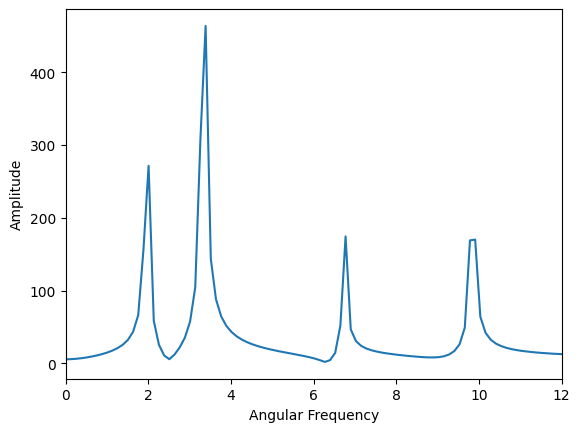

 Omega1=9.842,  A1=1.063
 Omega2=3.334,  A2=2.44
 Omega3=6.737,  A3=0.744
 Omega4=1.964,  A4=1.376



In [6]:
dt = tlist[1] - tlist[0]

freq = np.fft.fftfreq(len(y_list), d=dt)*2*np.pi
fourier_y = np.abs(np.fft.fft(y_list))

freq = np.fft.fftshift(freq)
fourier_y = np.fft.fftshift(fourier_y)

plt.plot(freq, fourier_y)
plt.xlim(0,12)
plt.xlabel("Angular Frequency")
plt.ylabel("Amplitude")
plt.show()
print(inf)
